###<font color = 'bisque'> Import des packages

In [2]:
# importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###<font color = 'bisque'> Lecture des données

In [3]:
# importer les données
df = pd.read_csv('/content/drive/MyDrive/Python_MF/Chapter 6/My_Streamlit_Dashboard/Transactions_data_cleaned.csv')

| **Variable**           | **Description (FR)**                                                                 |
| ---------------------- | ------------------------------------------------------------------------------------ |
| `TransactionId`        | Identifiant unique de la transaction sur la plateforme                               |
| `BatchId`              | Numéro unique attribué à un lot de transactions pour le traitement                   |
| `AccountId`            | Numéro unique identifiant le client sur la plateforme                                |
| `SubscriptionId`       | Numéro unique identifiant l’abonnement du client                                     |
| `CustomerId`           | Identifiant unique attaché au compte                                                 |
| `CurrencyCode`         | Devise du pays                                                                       |
| `CountryCode`          | Code géographique numérique du pays                                                  |
| `ProviderId`           | Fournisseur source de l’article acheté                                               |
| `ProductId`            | Nom de l’article acheté                                                              |
| `ProductCategory`      | Les ProductId sont regroupés dans ces grandes catégories de produits                 |
| `ChannelId`            | Indique si le client a utilisé le web, Android, iOS, le paiement différé ou checkout |
| `Amount`               | Valeur de la transaction. Positive pour les débits, négative pour les crédits        |
| `Value`                | Valeur absolue du montant                                                            |
| `TransactionStartTime` | Heure de début de la transaction                                                     |
| `PricingStrategy`      | Catégorie de la structure tarifaire de Xente pour les marchands                      |


In [4]:
# Afficher les données en utilisant head ou tail
df.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,Date,Hour,Day,Month,MargeBrute,TauxRentabilité
0,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,4,2019-02-13,10,13,2,0.0,0.0
1,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2,2019-02-13,10,13,2,0.0,0.0
2,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,2019-02-13,10,13,2,-100.0,-2.0
3,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,4,2019-02-13,10,13,2,0.0,0.0
4,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2,2019-02-13,10,13,2,-120.0,-2.0


In [5]:
# dimension des données
df.shape

(5000, 17)

In [7]:
# infos des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BatchId          5000 non-null   object 
 1   AccountId        5000 non-null   object 
 2   SubscriptionId   5000 non-null   object 
 3   CustomerId       5000 non-null   object 
 4   ProviderId       5000 non-null   object 
 5   ProductId        5000 non-null   object 
 6   ProductCategory  5000 non-null   object 
 7   ChannelId        5000 non-null   object 
 8   Amount           5000 non-null   float64
 9   Value            5000 non-null   int64  
 10  PricingStrategy  5000 non-null   int64  
 11  Date             5000 non-null   object 
 12  Hour             5000 non-null   int64  
 13  Day              5000 non-null   int64  
 14  Month            5000 non-null   int64  
 15  MargeBrute       5000 non-null   float64
 16  TauxRentabilité  5000 non-null   float64
dtypes: float64(3),

In [20]:
# valeurs de la variable ChannelID
df['ChannelId'].unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_5', 'ChannelId_1'],
      dtype=object)

###<font color = 'bisque'>Exploration des données avec Matplolib, Seaborn et Plotly Express

1. Analyse des volumes de transactions

In [8]:
# Transactions par jour
transactions_per_day = df.groupby('Date').size()
transactions_per_day

,0
Date,
2019-02-13,591
2019-02-14,3010
2019-02-15,1399


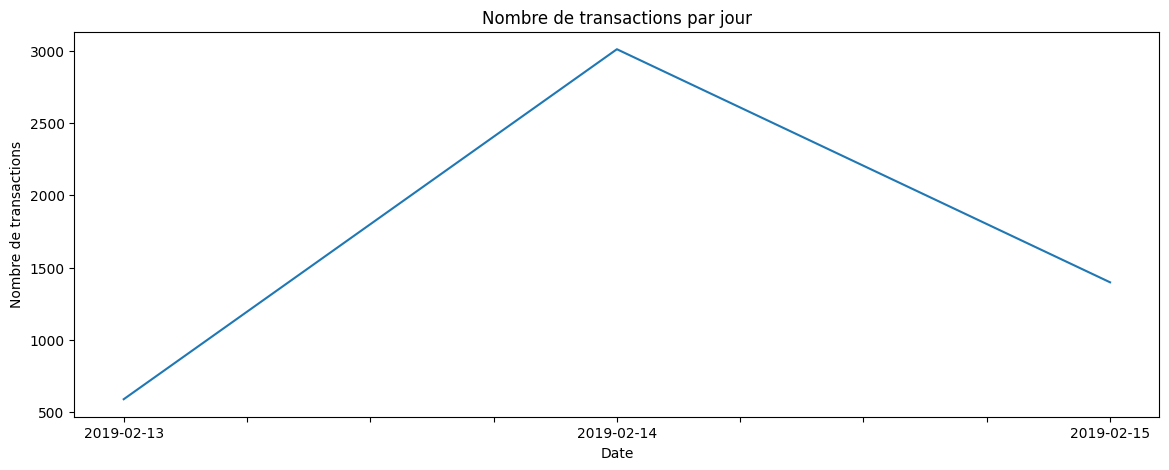

In [10]:
plt.figure(figsize=(14, 5)) # définir la figure
transactions_per_day.plot() # line plot
plt.title("Nombre de transactions par jour")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.show()

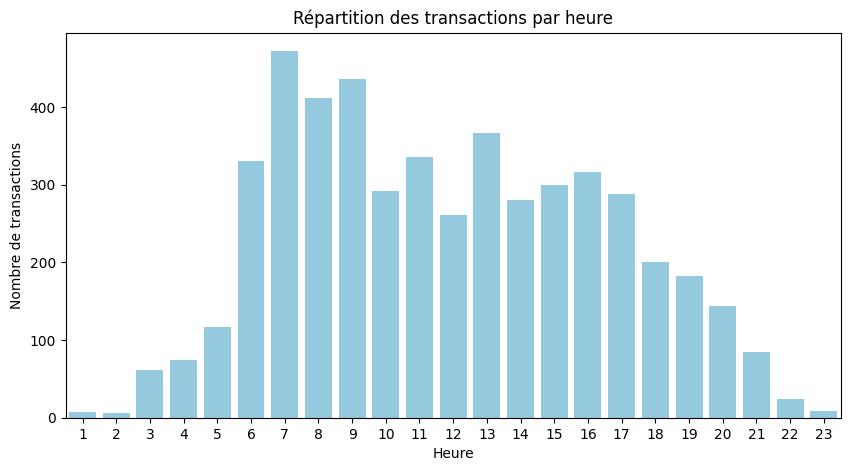

In [13]:
# Transactions par heure
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Hour', color='skyblue')
plt.title("Répartition des transactions par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre de transactions")
plt.show()

In [19]:
# Transactions par canal (pie chart)
channel_counts = df['ChannelId'].value_counts().reset_index()
channel_counts.columns = ['ChannelId', 'Count']
channel_counts

,ChannelId,Count
0,ChannelId_3,3381
1,ChannelId_2,1545
2,ChannelId_5,69
3,ChannelId_1,5


In [21]:
# pie plot
fig = px.pie(channel_counts, names='ChannelId', values='Count',
             title="Répartition des transactions par canal")
fig.show()

2. Analyse de la rentabilité

In [24]:
# Taux de rentabilité moyen par ProductCategory
rentabilite = df.groupby('ProductCategory')['TauxRentabilité'].mean().sort_values(ascending = False)
rentabilite

,TauxRentabilité
ProductCategory,
ticket,0.000000
tv,-0.005461
airtime,-0.066003
utility_bill,-0.150971
movies,-0.166667
data_bundles,-0.790123
financial_services,-1.539164
retail,-2.000000


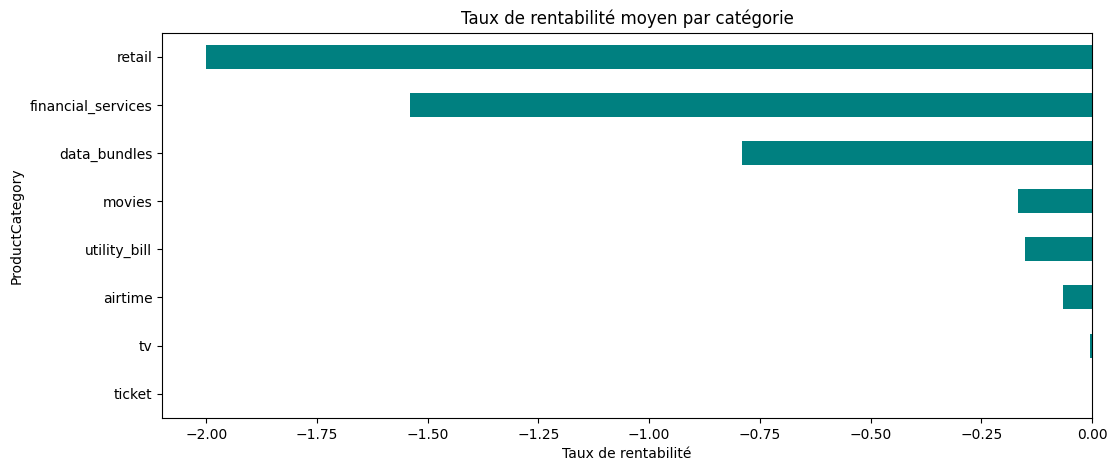

In [25]:
plt.figure(figsize=(12, 5))
rentabilite.plot(kind='barh', color='teal')
plt.title("Taux de rentabilité moyen par catégorie")
plt.xlabel("Taux de rentabilité")
plt.show()

In [28]:
# matrice de corrélation
slice_df_corr = df[['Amount', 'Value', 'MargeBrute', 'TauxRentabilité']].corr()  #  -1 <----- 0 ----> 1 , -1 -----> 0 <---- 1

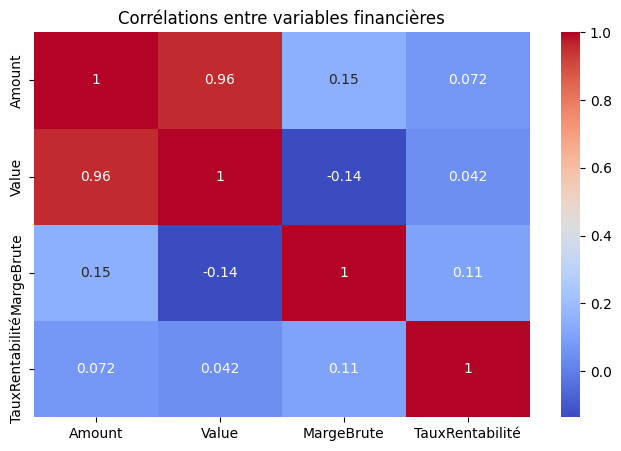

In [31]:
# Heatmap des corrélations
plt.figure(figsize=(8, 5))
sns.heatmap(slice_df_corr,annot= True, cmap='coolwarm')
plt.title("Corrélations entre variables financières")
plt.show()

3. Analyse par produit et catégorie

In [34]:
# Revenus par catégorie
revenue_per_category = df.groupby('ProductCategory')['Value'].sum().sort_values(ascending=False).reset_index( )
revenue_per_category


,ProductCategory,Value
0,financial_services,31639570
1,airtime,10933416
2,retail,5131700
3,utility_bill,1409707
4,tv,793560
5,data_bundles,294250
6,movies,235800
7,ticket,100000


In [35]:
fig = px.bar(revenue_per_category,
             x='ProductCategory', y='Value',
             title="Revenu total par catégorie de produit",
             color='Value')
fig.show()

4. Analyse temporelle de la marge

In [36]:
# Marge moyenne par jour
marge_par_mois = df.groupby('Day')['MargeBrute'].mean()
marge_par_mois

,MargeBrute
Day,
13,-1014.910321
14,-2008.288724
15,-8579.527162


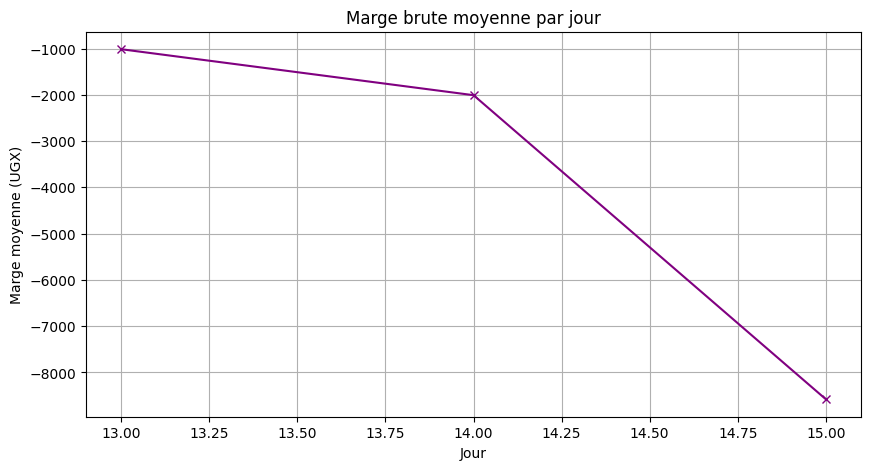

In [38]:
plt.figure(figsize=(10, 5))
marge_par_mois.plot(marker='x', color='purple')
plt.title("Marge brute moyenne par jour")
plt.xlabel("Jour")
plt.ylabel("Marge moyenne (UGX)")
plt.grid(True)
plt.show()

5. Les clients qui contribuent moins

In [42]:
# 10 clients contribuant moins
clients = df.groupby('CustomerId')['MargeBrute'].sum().sort_values(ascending=True).head(10).reset_index()
clients

,CustomerId,MargeBrute
0,CustomerId_4910,-1368000.0
1,CustomerId_3600,-844800.0
2,CustomerId_2547,-684200.0
3,CustomerId_914,-684000.0
4,CustomerId_1677,-684000.0
5,CustomerId_1668,-684000.0
6,CustomerId_4871,-684000.0
7,CustomerId_3394,-684000.0
8,CustomerId_2087,-684000.0
9,CustomerId_2566,-684000.0


In [43]:
fig = px.bar(clients, x='CustomerId', y='MargeBrute',
             title="10 clients contribuant faiblement",
             text='MargeBrute')
fig.show()

In [44]:
# Catégories les plus concernées par les remboursements
remboursements = df[df['Amount'] < 0]
top_remboursements = remboursements['ProductCategory'].value_counts().head(5)
top_remboursements

,count
ProductCategory,
financial_services,2175
airtime,63
data_bundles,32
retail,20
utility_bill,2


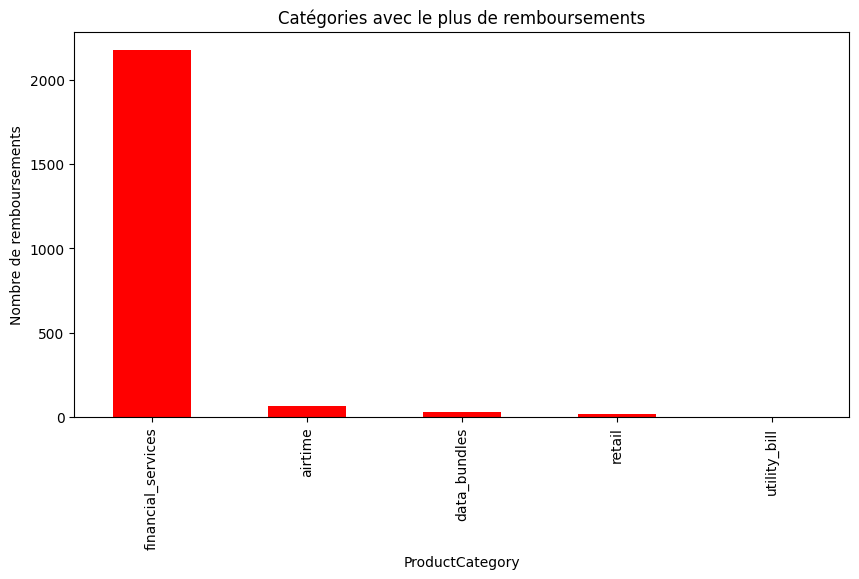

In [45]:
plt.figure(figsize=(10, 5))
top_remboursements.plot(kind='bar', color='red')
plt.title("Catégories avec le plus de remboursements")
plt.xlabel("ProductCategory")
plt.ylabel("Nombre de remboursements")
plt.show()